## اضافه کردن کتابخانه‌های مورد نیاز

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.externals import joblib
import matplotlib.pyplot as plt

c:\users\reza\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## داده
- داده استفاده شده در این سوال در فایل `data.csv` در کنار همین نوت‌بوک قرار داده شده است.
برای اینکه نتایج برای همه یکسان و قابل داوری باشد لازم است تا چند نکته را رعایت کنید.
- برای تبدیل مقادیر ستون `diagnosis` به عدد، 0 را معادل `B` و 1 را معادل `M` ذر نظر بگیرید.
- هنگام تقسیم داده به دو قسمت آموزش و آزمون `test_size=0.2` و `random_state=45` و `stratify=y` قرار دهید تا اندازه و مقادیر داده تست یکسان باشد.

In [2]:
df = pd.read_csv('data.csv')
df = pd.DataFrame(df)
df

id  compactness_mean  radius_mean diagnosis
0      842302           0.27760        17.99         M
1      842517           0.07864        20.57         M
2    84300903           0.15990        19.69         M
3    84348301           0.28390        11.42         M
4    84358402           0.13280        20.29         M
..        ...               ...          ...       ...
564    926424           0.11590        21.56         M
565    926682           0.10340        20.13         M
566    926954           0.10230        16.60         M
567    927241           0.27700        20.60         M
568     92751           0.04362         7.76         B

[569 rows x 4 columns]

In [3]:
X = df[['compactness_mean','radius_mean']].values
df['diagnosis'] = df['diagnosis'].map({'B':0,'M':1})
Y = df['diagnosis']
Y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [4]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, stratify = Y,random_state = 45)

تعدادی مدل `KNN` با ۲ تا ۱۰ همسایگی روی داده‌های آموزشی برازش کنید و هرکدام که `accuracy_score` بالاتری روی داده‌های آزمون داشت، به عنوان مدل نهایی انتخاب کنید.

In [5]:
K = [2,3,4,5,6,7,8,9,10]
acc = []
for k in K:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn = knn.fit(X_train,Y_train)
    y_pred_knn = knn.predict(X_test)
    acc.append(accuracy_score(Y_test,y_pred_knn))
acc

[0.8596491228070176,
 0.8596491228070176,
 0.8771929824561403,
 0.8596491228070176,
 0.8859649122807017,
 0.8859649122807017,
 0.8859649122807017,
 0.8859649122807017,
 0.868421052631579]

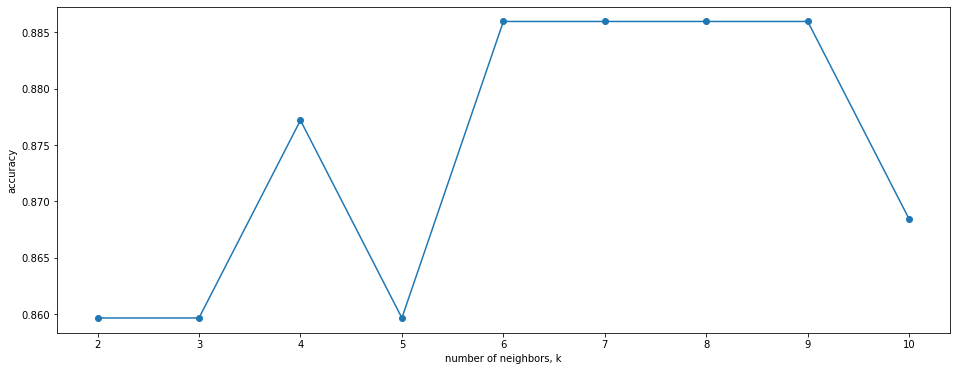

In [6]:
plt.figure(figsize = (16,6))
plt.plot(K, acc, '-o')
plt.xlabel('number of neighbors, k')
plt.ylabel('accuracy')
plt.xticks(K)
plt.show()


ماژول `joblib` به منظور ذخیره و لود کردن مدل‌های یادگیری ماشین در فایل استفاده می‌شود.

به این شکل می‌توانید مدل نهایی خود را فایل `model.pkl` ذخیره کنید.

In [7]:
final_model = KNeighborsClassifier(n_neighbors= 7)
final_model = final_model.fit(X_train,Y_train)
joblib.dump(final_model,'model.pkl')

['model.pkl']

ابتدا نوت‌بوک را ذخیره و سپس گزینه‌ی ارسال پاسخ را انتخاب کنید تا مدل به همراه این نوت‌بوک ارسال شود.